In [1]:
## Import Libraries

### Import data wrangling libraries
import numpy as np
import pandas as pd

### Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
## Load data
df = pd.read_csv("/Users/12785/OneDrive/桌面/Projects/NYC Housing - Python & Tableau/nyc_housing_base.csv")

## DATA SET INITIAL EXPLORATION

In [3]:
# INITIAL EXPLORATION

In [4]:
## Number of rows & columns of data set
df.shape

(34439, 19)

In [5]:
## The column names of the the data set
df.columns

Index(['borough_x', 'block', 'lot', 'sale_price', 'zip_code', 'borough_y',
       'yearbuilt', 'lotarea', 'bldgarea', 'resarea', 'comarea', 'unitsres',
       'unitstotal', 'numfloors', 'latitude', 'longitude', 'landuse',
       'bldgclass', 'building_age'],
      dtype='object')

In [6]:
## Examine the first 10 rows of data set
df.head(10)

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900,2404,6875,6875.0,0.0,18,18,5.0,40.724415,-73.983891,2.0,C6,125
1,1,402,36,2000000,10009.0,MN,1900,1919,7810,6810.0,1000.0,8,10,5.0,40.724975,-73.981535,2.0,C4,125
2,1,402,60,3400000,10009.0,MN,1920,2150,6152,5352.0,800.0,8,9,5.0,40.725346,-73.983112,4.0,C7,105
3,1,404,42,4000000,10009.0,MN,1855,2369,6990,6990.0,0.0,10,10,5.0,40.727398,-73.980600,2.0,C4,170
4,1,372,55,655000,10009.0,MN,1920,5298,17990,17990.0,0.0,20,20,5.0,40.720621,-73.979534,2.0,C6,105
5,1,373,46,470000,10009.0,SI,1944,3132,2440,440.0,2000.0,1,2,2.0,40.613137,-74.125878,4.0,K4,81
6,1,373,46,474000,10009.0,SI,1944,3132,2440,440.0,2000.0,1,2,2.0,40.613137,-74.125878,4.0,K4,81
7,1,374,8,1050000,10009.0,BK,1899,1400,2700,2700.0,0.0,3,3,3.0,40.678077,-73.999960,2.0,C0,126
8,1,375,30,330000,10009.0,MN,1902,3082,17556,17556.0,0.0,19,19,6.0,40.722625,-73.977788,2.0,C6,123
9,1,376,5,425000,10009.0,MN,1900,3772,15086,14086.0,1000.0,22,24,6.0,40.723737,-73.978783,2.0,C6,125


In [7]:
## View the number of data in each column and get to know the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   borough_x     34439 non-null  int64  
 1   block         34439 non-null  int64  
 2   lot           34439 non-null  int64  
 3   sale_price    34439 non-null  int64  
 4   zip_code      34423 non-null  float64
 5   borough_y     34439 non-null  object 
 6   yearbuilt     34439 non-null  int64  
 7   lotarea       34439 non-null  int64  
 8   bldgarea      34439 non-null  int64  
 9   resarea       34251 non-null  float64
 10  comarea       34251 non-null  float64
 11  unitsres      34439 non-null  int64  
 12  unitstotal    34439 non-null  int64  
 13  numfloors     34396 non-null  float64
 14  latitude      34433 non-null  float64
 15  longitude     34433 non-null  float64
 16  landuse       34436 non-null  float64
 17  bldgclass     34439 non-null  object 
 18  building_age  34439 non-nu

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough_x,34439.0,NaN,NaN,NaN,3.073608,1.287072,1.0,2.0,3.0,4.0,5.0
block,34439.0,NaN,NaN,NaN,4562.694532,3611.017542,1.0,1432.0,3854.0,6678.0,16350.0
lot,34439.0,NaN,NaN,NaN,60.057174,136.516558,1.0,14.0,33.0,59.0,3635.0
sale_price,34439.0,NaN,NaN,NaN,1171831.57159,1241374.732945,11863.0,512500.0,825000.0,1300000.0,9995000.0
zip_code,34423.0,NaN,NaN,NaN,10866.46437,557.770632,10001.0,10308.0,11210.0,11364.0,11697.0
borough_y,34439,5,QN,13168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearbuilt,34439.0,NaN,NaN,NaN,1941.007579,28.985203,1800.0,1920.0,1935.0,1960.0,2025.0
lotarea,34439.0,NaN,NaN,NaN,52440.222655,503204.166038,161.0,2090.0,3090.0,7502.0,22251600.0
bldgarea,34439.0,NaN,NaN,NaN,62715.702576,271266.328011,0.0,1614.5,2494.0,14500.0,3750565.0
resarea,34251.0,NaN,NaN,NaN,55930.398207,211602.91083,0.0,1356.0,2120.0,9816.0,2690565.0


Following the initial data set explorations, several data quality issues were identified that required attention prior to formal analysis:
1. We need to check if there are duplicate records in the data set
2. We noticed that there are NAs in several columns and we need to clean those NAs
3. There is value like "borough_x" & "landuse" which are categorical varibales represented by numbers.
   We should assign the correct categories to the value and change the datype of this column.

## DATA CLEANING
#### 1. Check the duplicates & Remove the duplicates
#### 2. Clean the NAs
#### 3. Adjust the data types for categorical variables & Assign the actual values to these variables

In [9]:
## 1. Check the duplicates:
df[df.duplicated()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
90,1,720,74,1135000,10011.0,MN,1857,2172,6349,6349.0,0.0,10,10,5.0,40.747138,-74.003587,2.0,C6,168
129,1,765,59,791134,10011.0,MN,1901,2581,9985,9985.0,0.0,17,17,5.0,40.740287,-74.000278,2.0,C6,124
130,1,765,59,791134,10011.0,MN,1901,2581,9985,9985.0,0.0,17,17,5.0,40.740287,-74.000278,2.0,C6,124
178,1,748,1,154988,10011.0,QN,1968,9783,1740,0.0,1740.0,0,1,1.0,40.753328,-73.911178,7.0,G4,57
182,1,748,1,117111,10011.0,QN,1968,9783,1740,0.0,1740.0,0,1,1.0,40.753328,-73.911178,7.0,G4,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30606,4,1238,40,310000,11377.0,BK,1910,2700,7400,7400.0,0.0,8,8,4.0,40.673278,-73.954465,2.0,C1,115
30624,4,1340,1,350000,11377.0,QN,1963,35360,136944,136944.0,0.0,159,160,6.0,40.741691,-73.901886,3.0,D4,62
30927,5,2833,31,262500,10305.0,SI,1964,77740,146640,146640.0,0.0,122,122,9.0,40.611061,-74.060238,3.0,D4,61
31191,5,327,60,175000,10301.0,SI,1967,75000,127800,127800.0,0.0,143,143,9.0,40.618975,-74.107018,3.0,D4,58


In [10]:
df = df.drop_duplicates()

In [11]:
## Now all duplicated records are removed
df.duplicated().sum()

np.int64(0)

In [12]:
## 2. Handle the NAs of the data set
## Let's see what columns have NAs
df.isna().sum()

borough_x         0
block             0
lot               0
sale_price        0
zip_code         16
borough_y         0
yearbuilt         0
lotarea           0
bldgarea          0
resarea         184
comarea         184
unitsres          0
unitstotal        0
numfloors        43
latitude          6
longitude         6
landuse           3
bldgclass         0
building_age      0
dtype: int64

In [13]:
## "landuse"
df[df['landuse'].isna()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
10830,3,6127,32,3779865,11209.0,BK,2008,12690,0,NaN,NaN,0,0,NaN,40.614149,-74.031242,NaN,Z9,17
12131,3,8671,968,375000,11235.0,BK,2014,1800,2026,0.0,2026.0,0,1,4.0,40.577179,-73.965859,NaN,Z9,11
18968,4,16062,34,1350000,11692.0,QN,1950,13978,450,0.0,450.0,0,0,1.0,40.596728,-73.804591,NaN,Z9,75


In [14]:
## I used the Brough-Block-Lot system and searched for the 3 properties:
## It turned out that these 3 properties do not belong to any landuse categories.
## Just dropped the 3 properties

In [15]:
df = df.dropna(subset = ['landuse'])

In [16]:
## Sanity check
df['landuse'].isna().sum()

np.int64(0)

In [17]:
## "latitude" & "longitude"
df[df['latitude'].isna()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
10228,3,6380,34,1500000,11214.0,BK,2002,5800,11616,0.0,11616.0,0,3,4.0,NaN,NaN,5.0,O2,23
10229,3,6380,49,8500000,11214.0,BK,1999,11600,31100,7900.0,23200.0,6,10,3.0,NaN,NaN,4.0,O8,26
11906,3,5618,43,1200000,11219.0,BK,1920,3000,3618,NaN,NaN,3,3,3.0,NaN,NaN,2.0,C0,105
12977,3,8211,135,725000,11236.0,BK,1965,2000,2080,2080.0,0.0,3,3,2.0,NaN,NaN,2.0,C0,60
14520,3,5193,30,999000,11226.0,BK,1899,4100,2396,NaN,NaN,2,2,2.0,NaN,NaN,1.0,B2,126
16873,3,6542,34,999000,11230.0,BK,1925,2000,1352,NaN,NaN,1,1,2.0,NaN,NaN,1.0,A9,100


In [18]:
## There are 6 properties that do not have latitude and longitude at the same time.
df[df['latitude'].isna()].index == df[df['longitude'].isna()].index

array([ True,  True,  True,  True,  True,  True])

In [19]:
## It requires much manual effort to locate the latitude and longitude values for the 6 properties
## Consider this is a small sample, I will drop these 6 rows

In [20]:
df = df.dropna(subset = ['latitude', 'longitude'])

In [21]:
## Sanity Check
df[['latitude','longitude']].isna().sum()

latitude     0
longitude    0
dtype: int64

In [22]:
## numfloors
df[df['numfloors'].isna()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
6940,2,4886,64,600000,10469.0,BX,1931,1235,0,NaN,NaN,0,0,NaN,40.880156,-73.839902,10.0,G0,94
7257,2,4543,46,1825000,10467.0,BX,2001,2127,0,NaN,NaN,0,0,NaN,40.869945,-73.869554,10.0,G0,24
7310,2,3487,139,900000,10473.0,BX,2011,1934,3068,2112.0,0.0,2,2,NaN,40.813775,-73.845185,1.0,B2,14
7402,2,5624,103,975000,10464.0,BX,1950,161,0,NaN,NaN,0,0,NaN,40.838479,-73.785027,10.0,G0,75
9283,2,3436,140,850000,10473.0,BX,2014,1483,2400,2400.0,0.0,2,2,NaN,40.806674,-73.849587,1.0,B2,11
9769,2,5058,50,844390,10466.0,BX,1925,2316,0,NaN,NaN,0,0,NaN,40.898906,-73.844343,10.0,G0,100
11539,3,8432,6,982611,11234.0,BK,2023,2650,2385,1590.0,0.0,1,1,NaN,40.618906,-73.904815,1.0,A5,2
11540,3,8432,7,889000,11234.0,BK,2023,2450,2203,1468.0,0.0,1,1,NaN,40.618961,-73.904876,1.0,A5,2
11541,3,8432,8,840065,11234.0,BK,2023,2450,2203,1468.0,0.0,1,1,NaN,40.619016,-73.904934,1.0,A5,2
11542,3,8432,9,972429,11234.0,BK,2023,2450,2203,1468.0,0.0,1,1,NaN,40.619068,-73.904995,1.0,A5,2


In [23]:
## We can fill in the number of floors by the median number of number of floors by building class
df['numfloors'] = (
    df.groupby('bldgclass')['numfloors']
      .transform(lambda x:x.fillna(x.median()))
)

In [24]:
## Sanity Check
df['numfloors'].isna().sum()

np.int64(1)

In [25]:
## Further investigation
df[df['numfloors'].isna()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
15502,3,8845,1660,785000,11229.0,BK,1950,1800,0,NaN,NaN,0,0,NaN,40.586344,-73.922017,11.0,V0,75


In [26]:
## Found out there is only 1 property has bldgclass == 'V0'
df.loc[df['bldgclass']=='V0']

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
15502,3,8845,1660,785000,11229.0,BK,1950,1800,0,NaN,NaN,0,0,NaN,40.586344,-73.922017,11.0,V0,75


In [27]:
## Just drop this row
df = df.dropna(subset = ['numfloors'])

In [28]:
## Sanity Check
df['numfloors'].isna().sum()

np.int64(0)

In [29]:
# resarea & comarea
df[df['resarea'].isna()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
1170,1,573,75,935000,10011.0,MN,1925,8210,56527,NaN,NaN,60,61,10.0,40.734105,-73.998347,3.0,D4,100
1171,1,573,75,1385000,10011.0,MN,1925,8210,56527,NaN,NaN,60,61,10.0,40.734105,-73.998347,3.0,D4,100
1172,1,573,75,3425000,10011.0,MN,1925,8210,56527,NaN,NaN,60,61,10.0,40.734105,-73.998347,3.0,D4,100
1290,1,609,75,7143000,10011.0,MN,1848,2060,3920,NaN,NaN,4,4,3.0,40.737819,-73.999480,2.0,C6,177
1843,1,2215,261,305000,10463.0,MN,1920,3376,0,NaN,NaN,1,1,1.0,40.877664,-73.911066,10.0,G0,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33842,5,504,48,155000,10301.0,SI,1950,2075,0,NaN,NaN,0,0,1.0,40.634557,-74.077744,10.0,G0,75
33924,5,8041,75,600000,10307.0,SI,1965,5500,1056,NaN,NaN,1,1,1.5,40.513984,-74.240741,1.0,A2,60
33944,5,7891,75,1260000,10307.0,SI,2008,4000,2226,NaN,NaN,2,2,2.0,40.505810,-74.243610,1.0,B2,17
34110,5,215,75,400000,10310.0,SI,1899,2565,2000,NaN,NaN,2,2,2.5,40.631915,-74.125304,1.0,B3,126


In [30]:
df[df['resarea'].isna()].index == df[df['comarea'].isna()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
## We can fill in the empty resarea & comarea by the median values based on properties' building classes

In [32]:
df['resarea'] = (
    df.groupby('bldgclass')['resarea']
      .transform(lambda x: x.fillna(x.median()))
)

In [33]:
df['comarea'] = (
    df.groupby('bldgclass')['resarea']
      .transform(lambda x: x.fillna(x.median()))
)

In [34]:
## Sanity Check
df[['resarea','comarea']].isna().sum()

resarea    3
comarea    3
dtype: int64

In [35]:
df[df['resarea'].isna()]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
10038,2,4651,91,4400000,10467.0,BX,1971,11176,8070,NaN,NaN,0,1,2.0,40.881761,-73.864457,5.0,H4,54
28310,4,16186,60,1275000,11694.0,QN,1930,4000,4976,NaN,NaN,12,12,3.0,40.579260,-73.834518,5.0,H4,95
33168,5,1003,4,8040000,10302.0,SI,2021,6200,26461,NaN,NaN,0,1,8.0,40.639695,-74.131722,5.0,HR,4


In [36]:
## There are no other properties classified in these 2 classes
df[df['bldgclass'].isin(['H4','HR'])]

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
10038,2,4651,91,4400000,10467.0,BX,1971,11176,8070,NaN,NaN,0,1,2.0,40.881761,-73.864457,5.0,H4,54
28310,4,16186,60,1275000,11694.0,QN,1930,4000,4976,NaN,NaN,12,12,3.0,40.579260,-73.834518,5.0,H4,95
33168,5,1003,4,8040000,10302.0,SI,2021,6200,26461,NaN,NaN,0,1,8.0,40.639695,-74.131722,5.0,HR,4


In [37]:
## Drop these 3 rows
df = df.dropna(subset = ['resarea','comarea'])

In [38]:
## Sanity Check
df[['resarea','comarea']].isna().sum()

resarea    0
comarea    0
dtype: int64

In [39]:
## zip_code
## zip_code is similar to latitude & longitude. We can find the accurate zipcodes but it requires much manual work
## Not a large sample size so just drop the NAs

In [40]:
df = df.dropna(subset = ['zip_code'])

In [41]:
## Final Sanity Check
df.isna().sum()

borough_x       0
block           0
lot             0
sale_price      0
zip_code        0
borough_y       0
yearbuilt       0
lotarea         0
bldgarea        0
resarea         0
comarea         0
unitsres        0
unitstotal      0
numfloors       0
latitude        0
longitude       0
landuse         0
bldgclass       0
building_age    0
dtype: int64

In [42]:
## 3. Change the data type for categorical values representing in numbers

In [43]:
## borough_x: Assign the correct borough names to their representing numbers
correct_names_borough = {
    1:'Manhattan',
    2:'Bronx',
    3:'Brooklyn',
    4:'Queens',
    5:'Staten Island'
}

df['borough_x'] = (
    df['borough_x']
    .map(correct_names_borough)
    .astype(object)
)

In [44]:
## landuse
correct_names_landuse = {
    1: 'One & Two Family Buildings',
    2: 'Multi-Family Walk-Up Buildings',
    3: 'Multi-Family Elevator Buildings',
    4: 'Mixed Residential & Commercial Buildings',
    5: 'Commercial & Office Buildings',
    6: 'Industrial & Manufacturing Buildings',
    7: 'Transportation & Utility',
    8: 'Public Facilities & Institutions',
    9: 'Open Space & Outdoor Recreation',
    10: 'Parking Facilities',
    11: 'Vacant Land'
}

df['landuse'] = df['landuse'].astype('int64')

df['landuse'] = (
    df['landuse']
    .map(correct_names_landuse)
    .astype(object)
)

In [45]:
## Overview of the cleaned data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33407 entries, 0 to 34438
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   borough_x     33407 non-null  object 
 1   block         33407 non-null  int64  
 2   lot           33407 non-null  int64  
 3   sale_price    33407 non-null  int64  
 4   zip_code      33407 non-null  float64
 5   borough_y     33407 non-null  object 
 6   yearbuilt     33407 non-null  int64  
 7   lotarea       33407 non-null  int64  
 8   bldgarea      33407 non-null  int64  
 9   resarea       33407 non-null  float64
 10  comarea       33407 non-null  float64
 11  unitsres      33407 non-null  int64  
 12  unitstotal    33407 non-null  int64  
 13  numfloors     33407 non-null  float64
 14  latitude      33407 non-null  float64
 15  longitude     33407 non-null  float64
 16  landuse       33407 non-null  object 
 17  bldgclass     33407 non-null  object 
 18  building_age  33407 non-null  i

In [46]:
## First 10 rows of the cleaned data set
df.head(10)

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,Manhattan,400,11,280000,10009.0,MN,1900,2404,6875,6875.0,6875.0,18,18,5.0,40.724415,-73.983891,Multi-Family Walk-Up Buildings,C6,125
1,Manhattan,402,36,2000000,10009.0,MN,1900,1919,7810,6810.0,6810.0,8,10,5.0,40.724975,-73.981535,Multi-Family Walk-Up Buildings,C4,125
2,Manhattan,402,60,3400000,10009.0,MN,1920,2150,6152,5352.0,5352.0,8,9,5.0,40.725346,-73.983112,Mixed Residential & Commercial Buildings,C7,105
3,Manhattan,404,42,4000000,10009.0,MN,1855,2369,6990,6990.0,6990.0,10,10,5.0,40.727398,-73.980600,Multi-Family Walk-Up Buildings,C4,170
4,Manhattan,372,55,655000,10009.0,MN,1920,5298,17990,17990.0,17990.0,20,20,5.0,40.720621,-73.979534,Multi-Family Walk-Up Buildings,C6,105
5,Manhattan,373,46,470000,10009.0,SI,1944,3132,2440,440.0,440.0,1,2,2.0,40.613137,-74.125878,Mixed Residential & Commercial Buildings,K4,81
6,Manhattan,373,46,474000,10009.0,SI,1944,3132,2440,440.0,440.0,1,2,2.0,40.613137,-74.125878,Mixed Residential & Commercial Buildings,K4,81
7,Manhattan,374,8,1050000,10009.0,BK,1899,1400,2700,2700.0,2700.0,3,3,3.0,40.678077,-73.999960,Multi-Family Walk-Up Buildings,C0,126
8,Manhattan,375,30,330000,10009.0,MN,1902,3082,17556,17556.0,17556.0,19,19,6.0,40.722625,-73.977788,Multi-Family Walk-Up Buildings,C6,123
9,Manhattan,376,5,425000,10009.0,MN,1900,3772,15086,14086.0,14086.0,22,24,6.0,40.723737,-73.978783,Multi-Family Walk-Up Buildings,C6,125


## EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION
#### 1. Sales Price Observation 
#### 2. Sales Price vs. Year Built
#### 3. Sales Price vs. Boroughs
#### 4. Sales Price vs. Landuse
#### 5. Landuse & Boroughs
#### 6. Sales Price vs. Building Area

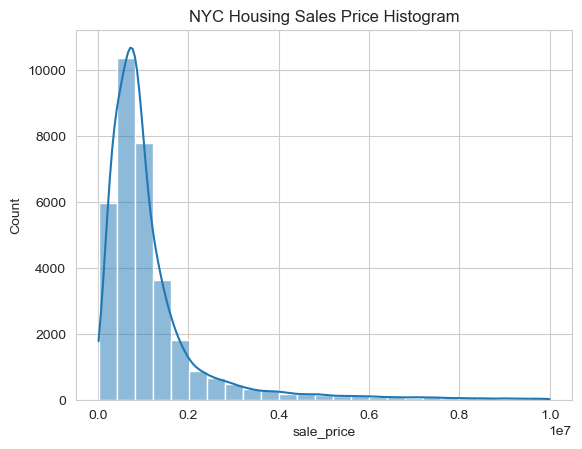

In [47]:
## Sales Price is the main variable of this analysis. 
## In real estate, especially in NYC, there are some very expensive houses and let's see if this is true in our data set:
sns.histplot(x = 'sale_price', data = df, kde = True, bins = 25)
plt.title('NYC Housing Sales Price Histogram')
plt.show()
## The NYC housing sales price is heavily right skewed. We will need to apply normalization to this variable before applying statistical analysis

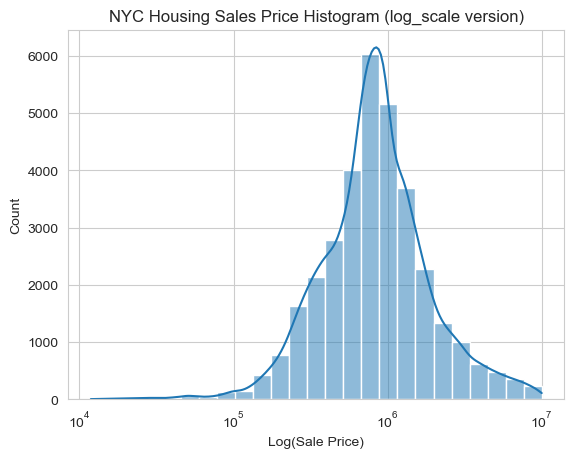

In [48]:
sns.histplot(x = 'sale_price', data = df, kde = True, bins = 25, log_scale = True)
plt.title('NYC Housing Sales Price Histogram (log_scale version)')
plt.xlabel('Log(Sale Price)')
plt.show()

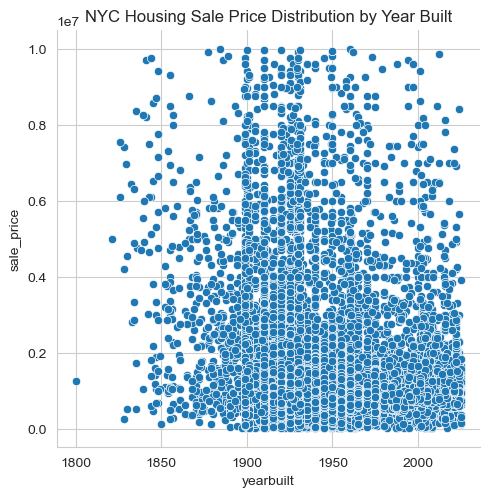

In [49]:
## Sale Price vs. Year Built
sns.relplot(x = 'yearbuilt',
            y = 'sale_price',
            data = df,
            kind = 'scatter')
plt.title('NYC Housing Sale Price Distribution by Year Built')
plt.show()

In [50]:
## Sale Price vs Borough
### Median Housing Sale Price in Different NYC Boroughs:
df.groupby('borough_y').agg(
    number_of_properties = ('sale_price','count'),
    median_sale_price = ('sale_price','median'),
).sort_values(by = 'median_sale_price', ascending = False)

,number_of_properties,median_sale_price
borough_y,,
BK,9657,960000.0
MN,3810,882250.0
QN,12764,790000.0
SI,3896,765000.0
BX,3280,730000.0


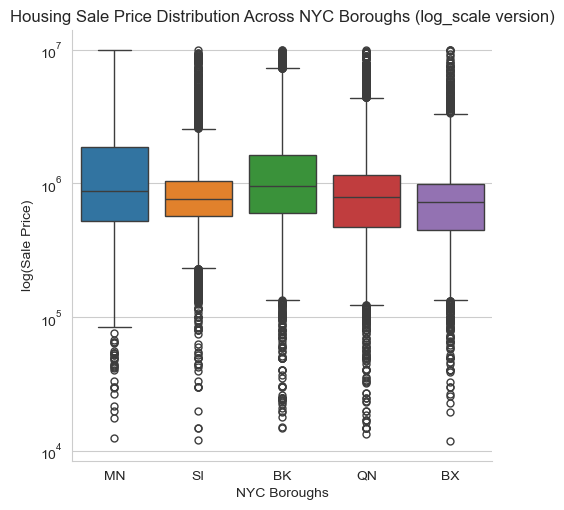

In [51]:
## Housing Sale Price Distribution in Different NYC Boroughs:
sns.catplot(data = df,
            x = 'borough_y',
            y = 'sale_price',
            kind = 'box',
            hue = 'borough_y',
            log_scale = True)
plt.title('Housing Sale Price Distribution Across NYC Boroughs (log_scale version)')
plt.xlabel('NYC Boroughs')
plt.ylabel('log(Sale Price)')
plt.show()

In [52]:
## Housing Sale Price Distribution Across Different Landuse Categories
### Median Housing Sale Price by landuse categories
df.groupby('landuse').agg(
    number_of_properties = ('sale_price','count'),
    median_sale_price = ('sale_price','median')
).sort_values(by = 'median_sale_price', ascending = False)

,number_of_properties,median_sale_price
landuse,,
Open Space & Outdoor Recreation,3,2650000.0
Industrial & Manufacturing Buildings,295,1650000.0
Commercial & Office Buildings,679,1250000.0
Mixed Residential & Commercial Buildings,1705,1200000.0
Public Facilities & Institutions,215,990000.0
Multi-Family Walk-Up Buildings,5410,980000.0
Transportation & Utility,135,940000.0
One & Two Family Buildings,18387,850000.0
Parking Facilities,110,775000.0


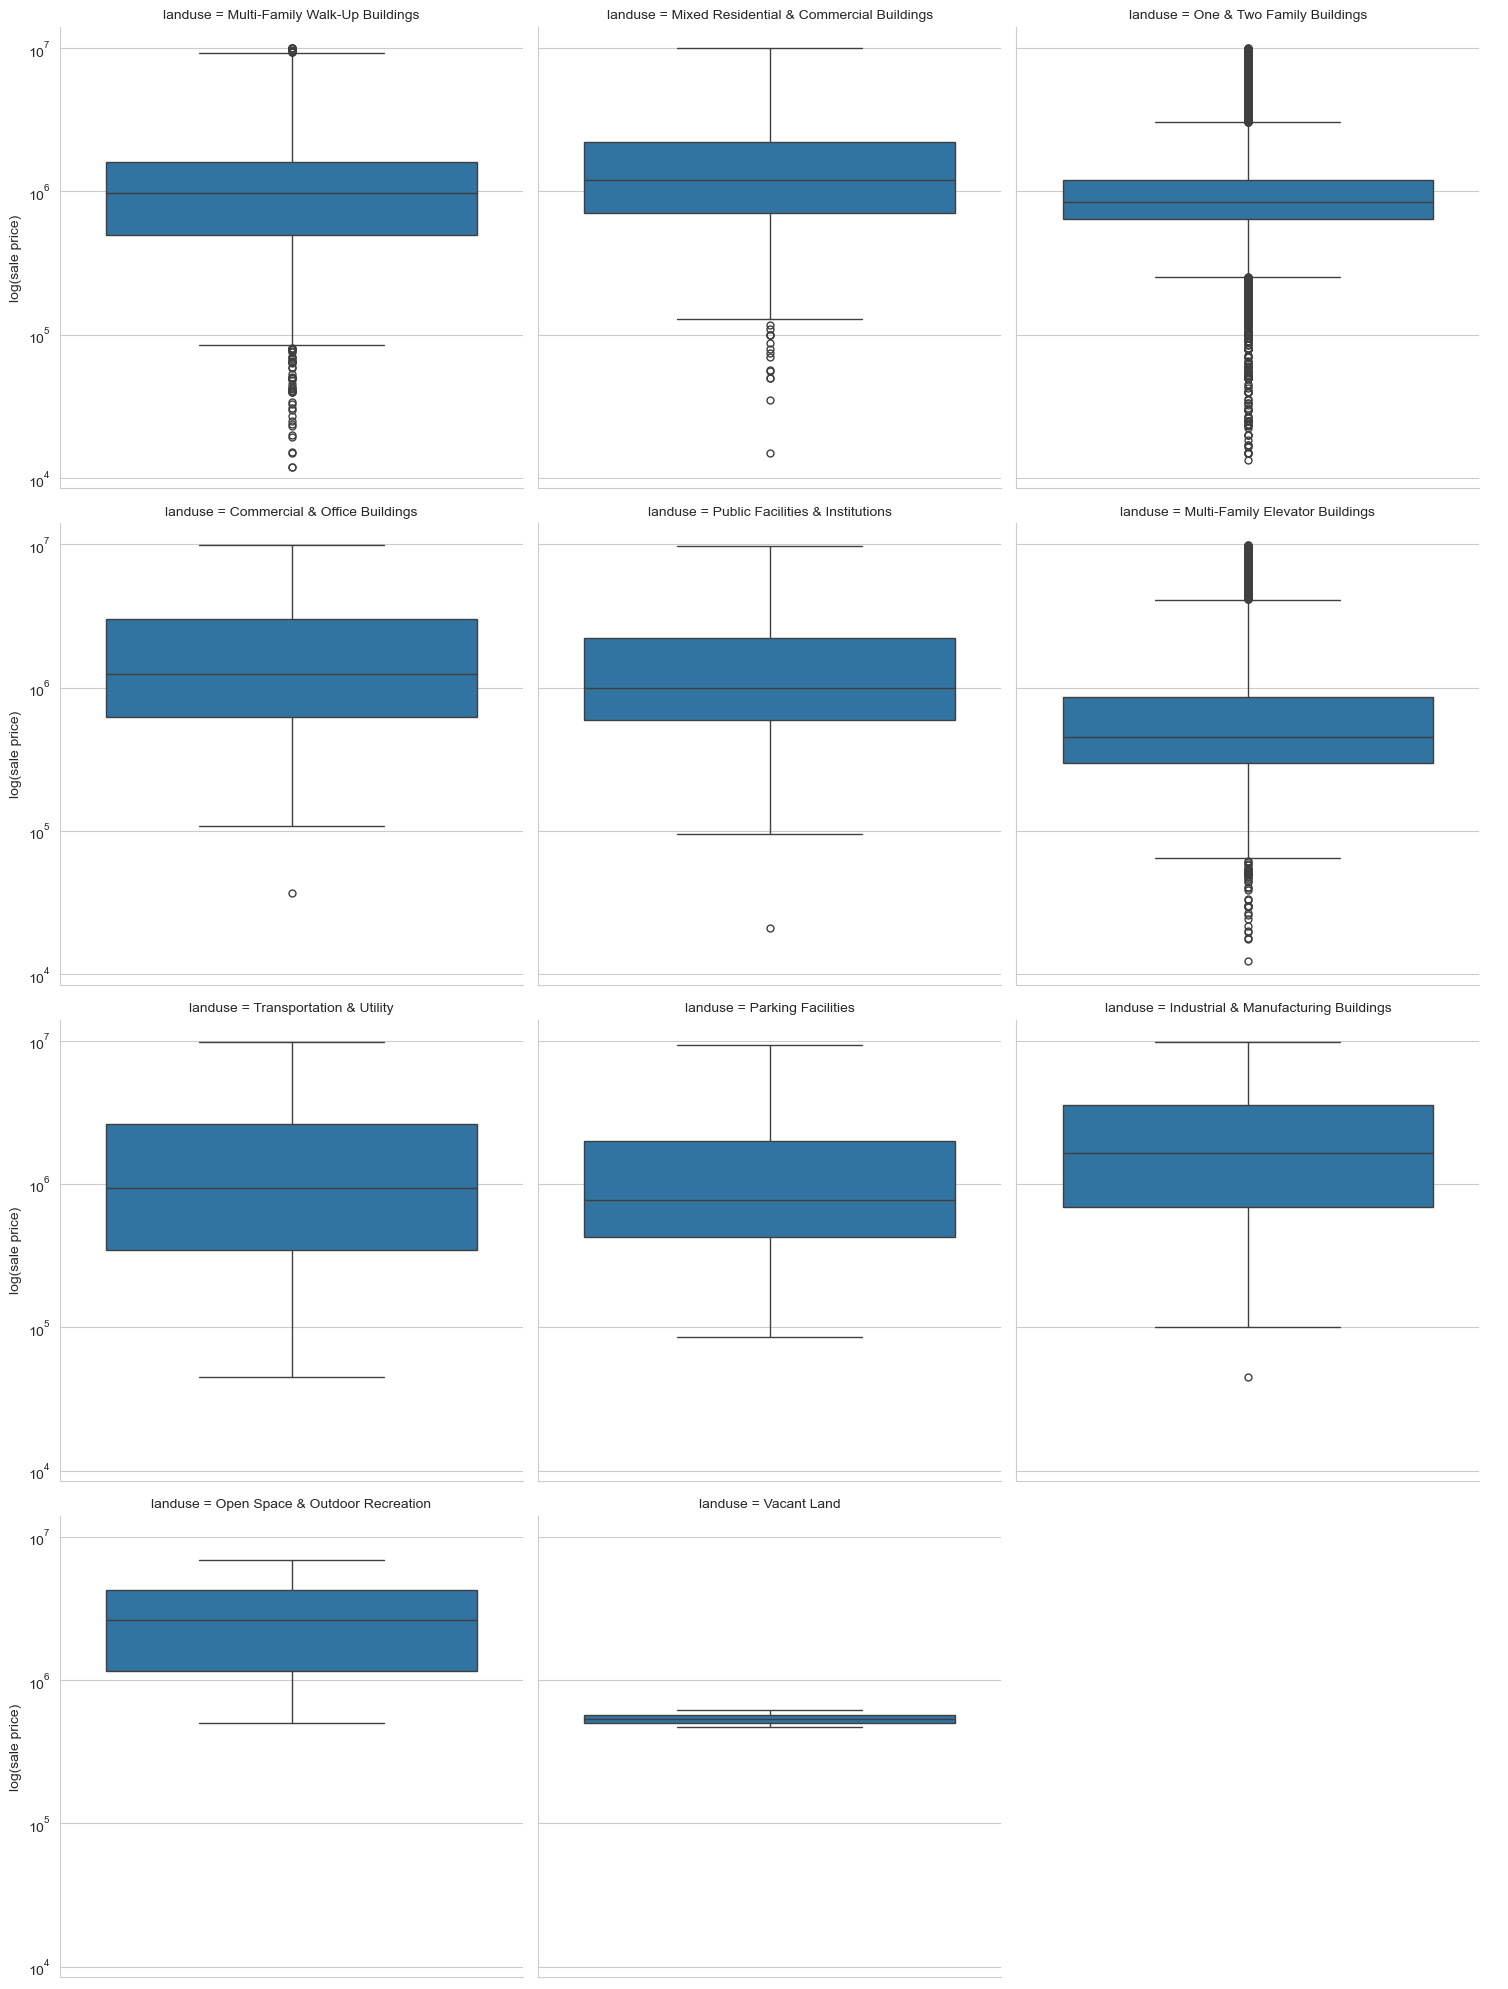

In [53]:
### The distribution of Housing Sale Price by Landuse categories
g = sns.catplot(data = df,
            y = 'sale_price',
            col = 'landuse',
            kind = 'box',
            log_scale = True,
            col_wrap = 3)
g.set_ylabels('log(sale price)')
plt.show()

In [54]:
## NYC Housing Landuse in Different Boroughs
## What are the most common property landuses in different boroughs?

## Count the number of proprety landuses in each boroughs
counts_landuse_in_each_borough = (
    df.groupby(['borough_y','landuse'])
      .size()
      .reset_index(name='count')
)

## Calculate the percent of property landuses in each boroughs
counts_landuse_in_each_borough['percent'] = (
    counts_landuse_in_each_borough['count'] /
    counts_landuse_in_each_borough.groupby('borough_y')['count'].transform('sum')
)

In [55]:
## Let's rank the most common property landuses in each borough
counts_landuse_in_each_borough.sort_values(
    by = ['borough_y','count'],
    ascending = [True, False]
)

,borough_y,landuse,count,percent
5,BK,One & Two Family Buildings,4824,0.499534
4,BK,Multi-Family Walk-Up Buildings,2276,0.235684
3,BK,Multi-Family Elevator Buildings,1129,0.116910
2,BK,Mixed Residential & Commercial Buildings,894,0.092575
0,BK,Commercial & Office Buildings,223,0.023092
1,BK,Industrial & Manufacturing Buildings,149,0.015429
7,BK,Public Facilities & Institutions,90,0.009320
6,BK,Parking Facilities,41,0.004246
8,BK,Transportation & Utility,31,0.003210
14,BX,One & Two Family Buildings,1817,0.553963


In [56]:
## Pivot the table to be ready to draft visualization
pivot_df = counts_landuse_in_each_borough.pivot(
    index = 'borough_y',
    columns = 'landuse',
    values = 'percent'
).fillna(0)

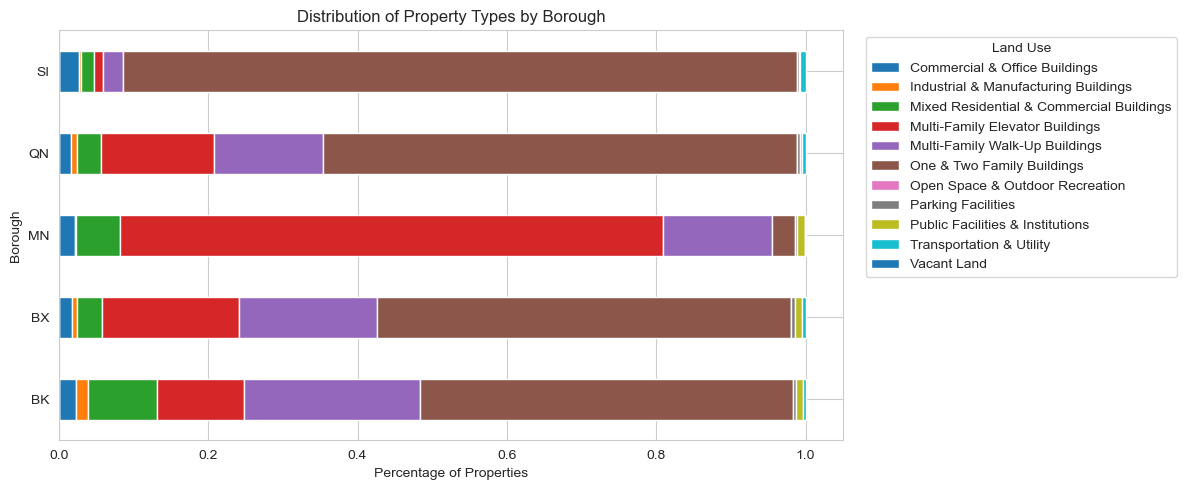

In [57]:
## Create the stacked bar percentage value visualization
pivot_df.plot(
    kind = 'barh',
    stacked = True,
    figsize = (12,5)
)
plt.xlabel('Percentage of Properties')
plt.ylabel('Borough')
plt.title('Distribution of Property Types by Borough')
plt.legend(
    title='Land Use',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

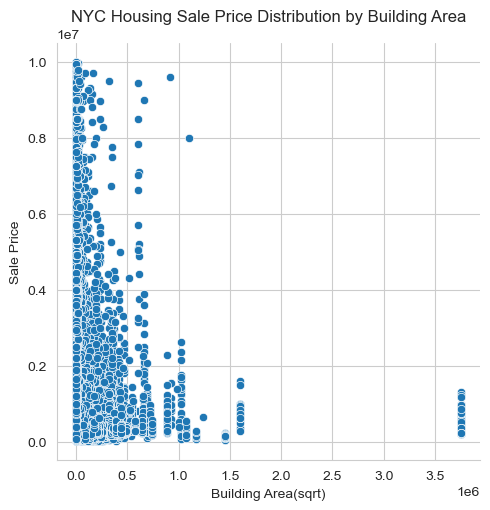

In [58]:
## NYC Housing Sale Price Distribution by Building Area
sns.relplot(data = df,
            x = 'bldgarea',
            y = 'sale_price',
            kind = 'scatter')
plt.title('NYC Housing Sale Price Distribution by Building Area')
plt.xlabel('Building Area(sqrt)')
plt.ylabel('Sale Price')
plt.show()

## SATISTICAL ANALYSIS - MACHINE LEARNING MODEL
#### 1. Prep Data Set for Machine Learning
#### 2. Correlation Chart & Base Sale Price Regression Analysis
#### 3. Random Forest Model
#### 4. Grandient Boost Model
#### 5. Feature Importance Table

In [59]:
df.columns

Index(['borough_x', 'block', 'lot', 'sale_price', 'zip_code', 'borough_y',
       'yearbuilt', 'lotarea', 'bldgarea', 'resarea', 'comarea', 'unitsres',
       'unitstotal', 'numfloors', 'latitude', 'longitude', 'landuse',
       'bldgclass', 'building_age'],
      dtype='object')

In [60]:
# 1. Prepare data for machine learning

## sale_price log transformation, create dependent variable
y = np.log(df['sale_price'])
y.name = 'log_sale_price'

## Create independent variables. Variables that can be excluded:
### 1. Geographic Details such as block, lot, zip_code, latitude, longitude
### 2. yearbuilt and building_age are basically the same things, keep building_age only
### 3. Also exclude the tax lot borough information
### 4. blgdclass is the sub-categories of landuse. Can also be excluded.
x = df[['borough_y','lotarea','bldgarea', 'resarea', 'comarea', 'unitsres',
       'unitstotal', 'numfloors','landuse', 'building_age']]

<Axes: >

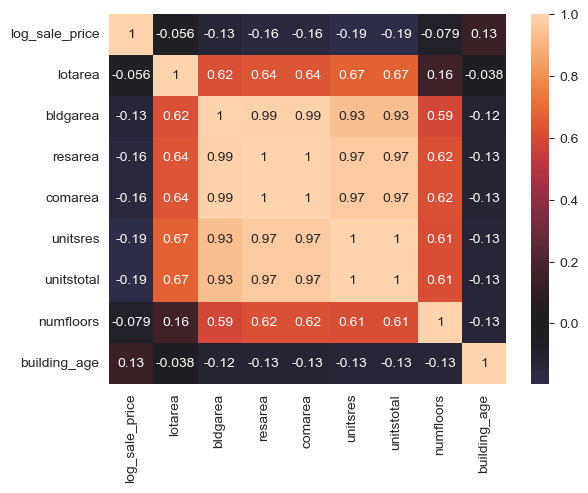

In [61]:
# 2. Correlation Chart & Base Sale Price Regression Analysis

## Creat a temp data set for correlation chart (Numeric Values Only)
corr_data_set = pd.concat([y,x[['lotarea','bldgarea', 'resarea', 'comarea', 'unitsres',
       'unitstotal', 'numfloors','building_age']]],axis = 1)

## Create correlation matrix
corr_matrix = corr_data_set.corr()

## Draw the correlation chart

sns.heatmap(
    corr_matrix,
    center=0,
    annot=True
)

In [62]:
# Linear Regression Model

## Create dummy variables for the categorical values
x_encoded = pd.get_dummies(x,drop_first = True)

## Create Train & Test splite
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y , test_size = 0.2, random_state = 30
)

## Create the base model
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print('R^2:', r2_score(y_test,y_pred))


R^2: 0.17767154064310353


In [63]:
# Random Forest Model
rf = RandomForestRegressor(
    n_estimators = 300,
    random_state = 30,
    n_jobs = -1
)

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

print('RF R^2:', r2_score(y_test, y_pred_rf))

RF R^2: 0.39980564979982947


In [64]:
# Radient Boost Model
gbr = GradientBoostingRegressor(
    random_state = 30
)

gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x_test)

print('Gradient Boosting R^2:', r2_score(y_test, y_pred_gbr))


Gradient Boosting R^2: 0.30452067360842416


In [65]:
# Model Comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R2": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr)
    ]
})

results

,Model,R2,RMSE,MAE
0,Linear Regression,0.177672,0.739924,0.527713
1,Random Forest,0.399806,0.632136,0.426518
2,Gradient Boosting,0.304521,0.680466,0.469982


In [66]:
## Random Forest Model Feature Importance 

## Create a Feature Importance Table:
rf_feature_importance = pd.DataFrame({
    'feature':x_train.columns,
    'importance':rf.feature_importances_
}).sort_values('importance',ascending = False)
rf_feature_importance

,feature,importance
0,lotarea,0.258912
1,bldgarea,0.165122
7,building_age,0.130502
4,unitsres,0.099124
3,comarea,0.074983
2,resarea,0.073950
6,numfloors,0.051765
5,unitstotal,0.042546
9,borough_y_MN,0.039427
10,borough_y_QN,0.016149


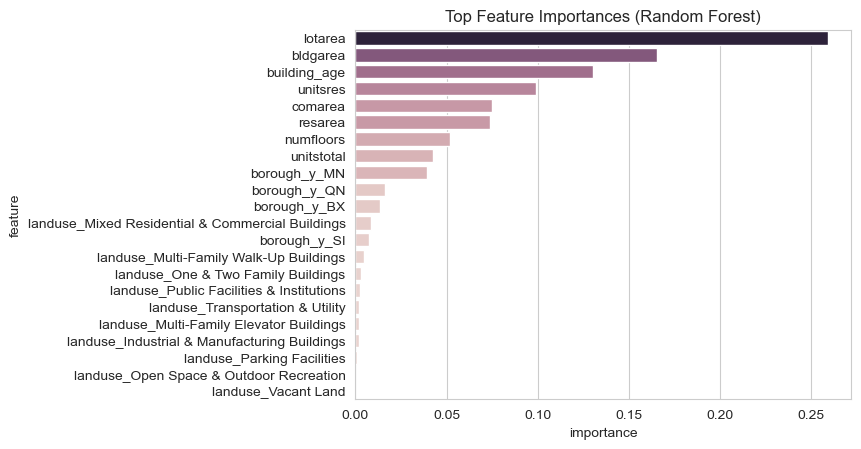

In [67]:
## Finally let's create a bar chart to visualize our results
sns.barplot(data = rf_feature_importance,
            y = 'feature',
            x = 'importance',
            hue = 'importance',
            legend = False)
plt.title('Top Feature Importances (Random Forest)')
plt.show()

## Export Cleaned Data Frame for Data Visualization in BI Tool

In [68]:
# df.to_csv('cleaned_NYC_Housing_Data.csv', index = False)